In [1]:
#CNN
#VGG16
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
#import the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Transform to tensor dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
#preprocess the data
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    return image,label

train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

#Data transformation
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size = 45000)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=10000)
          .batch(batch_size=32,drop_remainder=True)
         )


Train size: 50000
Test size: 10000


In [12]:
#setup the model
VGG16 = keras.models.Sequential([
  keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=[64, 64, 3]), #Conv1-1
  keras.layers.Conv2D(64, 3, padding="same"), #Conv1-2 
  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.relu),
  keras.layers.MaxPooling2D(2), #Pool1
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), #Conv2-1
  keras.layers.Conv2D(128, 3, padding="same"), #Conv2-2 
  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.relu),
  keras.layers.MaxPooling2D(2), #Pool2
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), #Conv3-1
  keras.layers.Conv2D(256, 3, padding="same"), #Conv3-2 
  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.relu),
  keras.layers.MaxPooling2D(2), #Pool3
  keras.layers.Conv2D(512, 3, activation="relu", padding="same"), #Conv4-1
  keras.layers.Conv2D(512, 3, activation="relu", padding="same"), #Conv4-2
  keras.layers.Conv2D(512, 3, padding="same"), #Conv4-3
  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.relu),
  keras.layers.MaxPooling2D(2), #Pool4
  keras.layers.Conv2D(512, 3, activation="relu", padding="same"), #Conv5-1
  keras.layers.Conv2D(512, 3, activation="relu", padding="same"), #Conv5-2
  keras.layers.Conv2D(512, 3, padding="same"), #Conv5-3
  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.relu),
  keras.layers.MaxPooling2D(2), #Pool5
  keras.layers.Flatten(),
  keras.layers.Dense(1024,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10,activation='softmax'),
]
)

In [13]:
VGG16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 128)      

In [14]:
VGG16.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']    
)

In [15]:
#20 epochs
history = VGG16.fit(
    train_ds,
    epochs=20,
    validation_data = test_ds,
    validation_freq=1
)

Epoch 1/20
1562/1562 [==============================] - 86s 53ms/step - loss: 1.8417 - accuracy: 0.3316 - val_loss: 1.4646 - val_accuracy: 0.4656
Epoch 2/20
1562/1562 [==============================] - 86s 53ms/step - loss: 1.4650 - accuracy: 0.4687 - val_loss: 1.3436 - val_accuracy: 0.5189
Epoch 3/20
1562/1562 [==============================] - 86s 53ms/step - loss: 1.2769 - accuracy: 0.5448 - val_loss: 1.2499 - val_accuracy: 0.5486
Epoch 4/20
1562/1562 [==============================] - 86s 53ms/step - loss: 1.1319 - accuracy: 0.5966 - val_loss: 1.1810 - val_accuracy: 0.5798
Epoch 5/20
1562/1562 [==============================] - 86s 53ms/step - loss: 1.0164 - accuracy: 0.6420 - val_loss: 1.2231 - val_accuracy: 0.5910
Epoch 6/20
1562/1562 [==============================] - 86s 53ms/step - loss: 0.9213 - accuracy: 0.6765 - val_loss: 0.9865 - val_accuracy: 0.6611
Epoch 7/20
1562/1562 [==============================] - 86s 53ms/step - loss: 0.8384 - accuracy: 0.7074 - val_loss: 0.9127 -

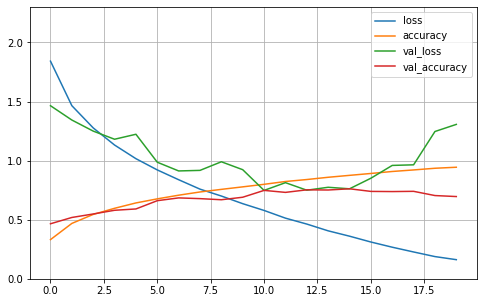

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.3) # set the vertical range to [0-1]
plt.show()